In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
1.65GB [00:08, 190MB/s]


In [ ]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
data1 = ['apple','house','pear','dog','doctor']

In [ ]:
def common(value):
  data2 = []
  d = []
  for i in value:
    data=model.most_similar(i)
    d = [i]
    d.append(data[:5])
    data2.append(d)
  return data2

In [ ]:
com = common(data1)

In [ ]:
com

[['apple',
  [('apples', 0.7203598022460938),
   ('pear', 0.6450696587562561),
   ('fruit', 0.6410146355628967),
   ('berry', 0.6302294731140137),
   ('pears', 0.6133961081504822)]],
 ['house',
  [('houses', 0.7072390913963318),
   ('bungalow', 0.6878559589385986),
   ('apartment', 0.6628996729850769),
   ('bedroom', 0.6496936678886414),
   ('townhouse', 0.6384080052375793)]],
 ['pear',
  [('pears', 0.7719403505325317),
   ('apricot', 0.7096841335296631),
   ('apricots', 0.6913131475448608),
   ('nectarine', 0.6751577854156494),
   ('Fuji_apple', 0.6750636100769043)]],
 ['dog',
  [('dogs', 0.8680489659309387),
   ('puppy', 0.8106428384780884),
   ('pit_bull', 0.780396044254303),
   ('pooch', 0.7627377510070801),
   ('cat', 0.7609456777572632)]],
 ['doctor',
  [('physician', 0.7806021571159363),
   ('doctors', 0.7476574182510376),
   ('gynecologist', 0.6947518587112427),
   ('surgeon', 0.6793397665023804),
   ('dentist', 0.6785441637039185)]]]

The predicted words are similar to the original one as they belong to the same category

Question 2) (30 points) Using the Homework 2 dataset, also attached in the Exam 2 files,
shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity
using:
a) Cosine similarity. And create a 42 x 42 heatmap of these similarities.
b) Use Doc2Vec to create document embeddings and find the similarities between the
documents. To visualize this, also create a 42 x 42 heatmap for this.
c) What are the differences you find between the two methods? Is there anything radically
different? Please describe your answer in terms of the heatmap of part a and part b.


In [33]:
import os, random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [37]:
path = '/content/drive/MyDrive/shakespeares-works_TXT_FolgerShakespeare'

In [38]:
txt = os.listdir(path)

In [39]:
list1 = []

for f in txt :
  list1.append(open(os.path.join(path,f), 'r').read())

In [47]:
# a)
tf = TfidfVectorizer()
tr = tf.fit_transform(list1)

In [48]:
cos = cosine_similarity(tr,tr)
print(cos)

[[1.         0.77494139 0.70637941 ... 0.81097319 0.59536997 0.66267568]
 [0.77494139 1.         0.69990711 ... 0.83172303 0.59251467 0.65190502]
 [0.70637941 0.69990711 1.         ... 0.7302251  0.56777768 0.62809744]
 ...
 [0.81097319 0.83172303 0.7302251  ... 1.         0.61221239 0.67887912]
 [0.59536997 0.59251467 0.56777768 ... 0.61221239 1.         0.52581905]
 [0.66267568 0.65190502 0.62809744 ... 0.67887912 0.52581905 1.        ]]


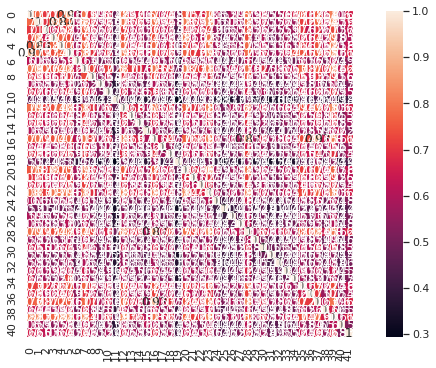

In [49]:
sns.heatmap(cos, square=True, annot=True)

In [40]:
# b)
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [41]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list1)]

In [42]:
import gensim
 
model1 = gensim.models.Doc2Vec(documents, dm = 0, alpha=0.025, size= 20, min_alpha=0.025, min_count=0)
 
for epoch in range(200):
    if epoch % 20 == 0:
        print ('Now training epoch %s'%epoch)
    model1.train(documents,epochs=1,total_examples=model1.corpus_count)
    model1.alpha -= 0.002  
    model1.min_alpha = model1.alpha 
 

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Now training epoch 0
Now training epoch 20
Now training epoch 40
Now training epoch 60
Now training epoch 80
Now training epoch 100
Now training epoch 120
Now training epoch 140
Now training epoch 160
Now training epoch 180


In [43]:
lq = model1.docvecs.most_similar(1,topn=42)

In [ ]:
lq

In [55]:
cos = cosine_similarity(lq,lq)

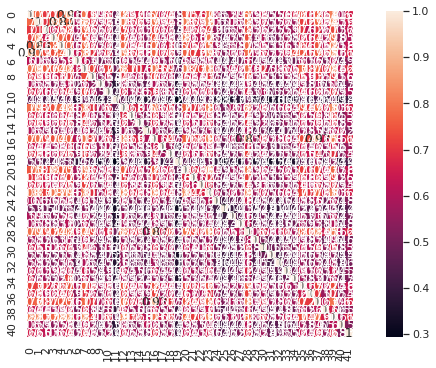

In [50]:
sns.heatmap(cos, square=True, annot=True)

c) There is no much radical difference between the two . we can identify it with the heatmaps

Question 3) (30 points) Using the Homework 2 dataset. Use SpaCy to extract the following:
a) Write a function to generate all unique bigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of bigrams and their frequency. Display the top 10 most common bigrams and their
frequency

In [51]:
import os, random
import numpy as np
import spacy
nlp = spacy.load("en_core_web_sm")

In [52]:
# a)
def bigram(ti):
  r= []
  s = []

  for token in ti:
    if token.is_alpha:
      s.append(token)
  
  for w in range(len(s) - 1):
    fw = s[w]
    sw = s[w + 1]
    el = [fw,sw]
    r.append(el)
  return(r)

In [53]:
bi_gram = []
for f in txt:
  t = open(os.path.join(path,f), 'r').read()
  doc = nlp(t)
  bi = bigram(doc)
  bi_gram.append(bi)


In [ ]:
bi_gram

[[[Henry, IV],
  [IV, Part],
  [Part, I],
  [I, by],
  [by, William],
  [William, Shakespeare],
  [Shakespeare, Edited],
  [Edited, by],
  [by, Barbara],
  [Barbara, Mowat],
  [Mowat, and],
  [and, Paul],
  [Paul, Werstine],
  [Werstine, with],
  [with, Michael],
  [Michael, Poston],
  [Poston, and],
  [and, Rebecca],
  [Rebecca, Niles],
  [Niles, Folger],
  [Folger, Shakespeare],
  [Shakespeare, Library],
  [Library, Created],
  [Created, on],
  [on, Jul],
  [Jul, from],
  [from, FDT],
  [FDT, version],
  [version, Characters],
  [Characters, in],
  [in, the],
  [the, Play],
  [Play, KING],
  [KING, HENRY],
  [HENRY, IV],
  [IV, formerly],
  [formerly, Henry],
  [Henry, Bolingbroke],
  [Bolingbroke, PRINCE],
  [PRINCE, HAL],
  [HAL, Prince],
  [Prince, of],
  [of, Wales],
  [Wales, and],
  [and, heir],
  [heir, to],
  [to, the],
  [the, throne],
  [throne, also],
  [also, called],
  [called, Harry],
  [Harry, and],
  [and, Harry],
  [Harry, Monmouth],
  [Monmouth, LORD],
  [LORD, JOHN

b) Write a function to generate all unique trigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of trigrams and their frequency. Display the top 10 most common trigrams and their
frequency.


In [ ]:
# b)
def trigram(ti):
  r= []
  s = []

  for token in ti:
    if token.is_alpha:
      s.append(token)
  
  for w in range(len(s) - 2):
    fw = s[w]
    sw = s[w + 1]
    tw = s[w + 2]
    el = [fw,sw,tw]
    r.append(el)
  return(r)

In [ ]:
tri_gram = []
for f in txt:
  t = open(os.path.join(path,f), 'r').read()
  doc = nlp(t)
  tri = trigram(doc)
  tri_gram.append(tri)

In [ ]:
tri_gram

[[[Henry, IV, Part],
  [IV, Part, I],
  [Part, I, by],
  [I, by, William],
  [by, William, Shakespeare],
  [William, Shakespeare, Edited],
  [Shakespeare, Edited, by],
  [Edited, by, Barbara],
  [by, Barbara, Mowat],
  [Barbara, Mowat, and],
  [Mowat, and, Paul],
  [and, Paul, Werstine],
  [Paul, Werstine, with],
  [Werstine, with, Michael],
  [with, Michael, Poston],
  [Michael, Poston, and],
  [Poston, and, Rebecca],
  [and, Rebecca, Niles],
  [Rebecca, Niles, Folger],
  [Niles, Folger, Shakespeare],
  [Folger, Shakespeare, Library],
  [Shakespeare, Library, Created],
  [Library, Created, on],
  [Created, on, Jul],
  [on, Jul, from],
  [Jul, from, FDT],
  [from, FDT, version],
  [FDT, version, Characters],
  [version, Characters, in],
  [Characters, in, the],
  [in, the, Play],
  [the, Play, KING],
  [Play, KING, HENRY],
  [KING, HENRY, IV],
  [HENRY, IV, formerly],
  [IV, formerly, Henry],
  [formerly, Henry, Bolingbroke],
  [Henry, Bolingbroke, PRINCE],
  [Bolingbroke, PRINCE, HAL]

c) Write a function to extract all unique NOUN and VERB tokens. The input of this function
should be the concatenated dataset and the output should be two lists: one of the NOUN
tokens and their frequency, the other list should be the VERB tokens and their counts.
Display the top 10 most common NOUN and VERB tokens.


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=c9d7d50426caa61effe1df11c60204063c993f908aec43c53882b41e9d0d2c34
  Stored in directory: /tmp/pip-ephem-wheel-cache-roqkoyxd/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.max_length = 6030000 

In [ ]:
strn = ''.join(list1)

In [ ]:
doc = nlp(strn)

In [ ]:
def noun_count(doc):
  noun = []
  for token in doc:
    if token.pos_=='NOUN':
      noun.append(token)
  return noun

In [ ]:
count = noun_count(doc)

In [ ]:
count

[Part,
 https://shakespeare.folger.edu/shakespeares-works/henry-iv-part-1/,
 version,
 0.9.2,
 Characters,
 KING,
 throne,
 son,
 EARL,
 LADY,
 EARL,
 father,
 uncle,
 earl,
 lady,
 father,
 archbishop,
 priest,
 knight,
 knight,
 setter,
 robbers,
 VINTNER,
 keeper,
 apprentice,
 tapster,
 Scene,
 King,
 others,
 care,
 time,
 peace,
 accents,
 broils,
 strands,
 entrance,
 soil,
 lips,
 children,
 blood,
 war,
 channel,
 fields,
 flow'rets,
 paces,
 eyes,
 meteors,
 nature,
 substance,
 shock,
 close,
 butchery,
 ranks,
 way,
 acquaintance,
 allies,
 edge,
 war,
 knife,
 master,
 friends,
 sepulcher,
 soldier,
 cross,
 power,
 arms,
 mothers,
 womb,
 pagans,
 fields,
 acres,
 feet,
 years,
 advantage,
 cross,
 purpose,
 month,
 bootless,
 cousin,
 council,
 expedience,
 WESTMORELAND,
 liege,
 haste,
 question,
 limits,
 charge,
 yesternight,
 athwart,
 post,
 news,
 men,
 hands,
 people,
 corpse,
 misuse,
 transformation,
 shame,
 retold,
 KING,
 tidings,
 broil,
 business,
 WESTMORE

In [ ]:
frequency = {}

for i in count :
  if i in frequency: frequency[i] +=1
  else : frequency[i] = 1

In [ ]:
t = sorted(frequency.items(), key=lambda x:-x[1])[:10]

In [ ]:
t

[(Part, 1),
 (https://shakespeare.folger.edu/shakespeares-works/henry-iv-part-1/, 1),
 (version, 1),
 (0.9.2, 1),
 (Characters, 1),
 (KING, 1),
 (throne, 1),
 (son, 1),
 (EARL, 1),
 (LADY, 1)]

In [ ]:
def verb_count(doc):
  noun = []
  for token in doc:
    if token.pos_=='VERB':
      noun.append(token)
  return noun

In [ ]:
count1 = verb_count(doc)

In [ ]:
count1

[Edited,
 Created,
 heir,
 called,
 JOHN,
 called,
 called,
 earl,
 associated,
 called,
 called,
 Enter,
 shaken,
 Find,
 frighted,
 pant,
 breathe,
 commenced,
 Shall,
 daub,
 trenching,
 bruise,
 opposed,
 bred,
 meet,
 beseeming,
 shall,
 cut,
 engaged,
 shall,
 levy,
 molded,
 chase,
 walked,
 nailed,
 tis,
 tell,
 will,
 go,
 meet,
 let,
 hear,
 yesternight,
 decree,
 forwarding,
 set,
 came,
 Leading,
 fight,
 taken,
 butchered,
 done,
 may,
 spoken,
 seems,
 matched,
 Came,
 import,
 approved,
 met,
 spend,
 hour--,
 told,
 brought,
 take,
 lighted,
 Stained,
 brought,
 discomfited,
 Balked,
 see,
 took,
 beaten,
 boast,
 mak'st,
 mak'st,
 sin,
 Should,
 blest,
 looking,
 See,
 stain,
 could,
 proved,
 exchanged,
 lay,
 called,
 would,
 mine,
 let,
 think,
 surprised,
 keeps,
 sends,
 shall,
 makes,
 prune,
 bristle,
 sent,
 answer,
 must,
 neglect,
 Will,
 hold,
 inform,
 come,
 said,
 done,
 can,
 uttered,
 will,
 exit,
 Enter,
 unbuttoning,
 sleeping,
 forgotten,
 demand,
 k

In [ ]:
frequency1 = {}

for i in count1 :
  if i in frequency1: frequency1[i] +=1
  else : frequency1[i] = 1

In [ ]:
t = sorted(frequency1.items(), key=lambda x:-x[1])[:10]

In [ ]:
t

[(Edited, 1),
 (Created, 1),
 (heir, 1),
 (called, 1),
 (JOHN, 1),
 (called, 1),
 (called, 1),
 (earl, 1),
 (associated, 1),
 (called, 1)]

d) What do you think the most common bigrams and trigrams could be useful for? There is
a particular method we have seen in this class to characterize a corpus that could benefit
from having these bigrams/trigrams when the underlying text corpus can’t be shared.
Please talk about this.


The bigrams and trigrams can be used to identify the most used words for determining the idea of the writing

Question 4) (30 points) Using the dataset: Ask0729, found in Exam files, write two functions to
extract all dates found in this dataset. The input of these functions should take the dataset as
input, and output a list of dates. You should use two different methods, one per function.
a) First method: using SpaCy (this is a big enough hint)
b) Second method: using regular expressions.
c) Print to screen to compare the results from the two functions.
d) Which one of the two approaches was better? Why do you think so? Would you use any
of these approaches? Or a different one?


In [ ]:
import datetime
from datetime import date
import re


In [ ]:
!unzip '/content/drive/MyDrive/Ask0729.zip'

Archive:  /content/drive/MyDrive/Ask0729.zip
  inflating: Ask0729-fixed.txt       


a) Using Spacy

In [ ]:
go = open("Ask0729-fixed.txt", "r").read()

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(go)
count = 0

for ent in doc.ents:
  if ent.label_ == 'DATE':
    count +=1
    print(ent.text)
    #print(ent.text, ent.start_char, ent.end_char, ent.label_)
print("total number of dates :",count)

up to 5 years
today
today
today
one week
MA 02143
daily
today
3+ Nights & Save
this week
weekend
this week
2 Weeks
the year
tomorrow
Wednesday
Saturday
the 6 year old
tomorrow
25 years
year end 2000
under 40/over 40
junior-year
all summer
next week
yesterday
Monday
Thursday 4:00PM
July 31, 2014
30 June 2012
April 15th
this year
this time
next year
years
Friday
Monday
December 7th
yesterday
yesterday
tomorrow
14 day
2 days
years
tomorrow
tomorrow
tomorrow
the next year
Sunday
a day
12 MONTHS
July 4, 2012
Tomorrow
this week
Tuesday, March 20, 2001
annual
21st Century
this week
tomorrow
next Wednesday
the old days
Next week
April
the 19th
August 31st
the year
only a week
June 23, 2000
today
Last week
Friday
the week
the 31st of March
1 Year Giveaway
Thanksgiving
Today
Tomorrow
2 weeks ago
every day
weekly
annual
tomorrow
A few weeks ago
this week
1999
2000
annual
2081
Monday
March 8, 2013
the late 18th century
last week
today
next week
Sunday
the next two weeks
a few weeks
today
1850-1940

b) Using Regular expression

In [ ]:
go = open("Ask0729-fixed.txt", "r").read()

In [ ]:
import re
reg = re.compile(r'(?:\d{1,2}[-/th|st|nd|rd\s.])?(?:(?:Jan|January|Feb|February|Mar|March|Apr|April|May|Jun|June|Jul|July|August|Sep|September|Oct|October|Nov|November|Dec|December)[\s,.])?(?:(?:\d{1,2})[-/th|st|nd|rd\s,.])?(?:\d{2,4})')

In [ ]:
match = [x.group() for x in reg.finditer(go)]

In [ ]:
c = 0

for i in match :
  c +=1

print("total number of dates :", c)

total number of dates : 936


Question 5) (30 points) Train an LSTM model to classify the Cornell Movie Review data
using the polarity_dataset V2.0. You can use the code for class 19, but take a note that
you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use
85% of the dataset for training, and 15% for testing. Once you build the model, please display
the sklearn classification report. What are you noticing here? Anything unexpected? How does
this model compare to the one built with the IMDB dataset in class? Any ideas on how to
improve it?


In [ ]:
!tar -xvf '/content/drive/MyDrive/review_polarity.tar.gz'

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv014_15600.txt
txt_sentoken/neg/cv015_29356.txt
txt_sentoken/neg/cv016_4348.txt
txt_sentoken/neg/cv017_23487.txt
txt_sentoken/neg/cv018_21672.txt
txt_sentoken/neg/cv019_16117.txt
txt_sentoken/neg/cv020_9234.txt
txt_sentoken/neg/cv021_17313.txt
txt_sentoken/neg/cv022_14227.txt
txt_sentoken/neg/cv023_13847.txt
txt_sentoken/neg/cv024_7033.txt
txt_sentoken/neg/cv025_29825.txt
txt_sentoken/neg/cv026_29229.txt
txt_sentoken/neg/cv027_26270.txt
txt_sentoken/neg/cv028_26964.txt
txt_sentoken/neg/cv029_19943.txt
txt_sentoken/n

In [ ]:
!pip install numpy==1.16.2

import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

import logging
logging.getLogger('tensorflow').disabled = True

In [ ]:
path1 = '/content/txt_sentoken/pos/'

In [ ]:
txt1 = os.listdir(path)

In [ ]:
d = []

for f in txt1 :
  d.append(open(os.path.join(path,f), 'r').read())

In [ ]:
path2 = '/content/txt_sentoken/neg/'

In [ ]:
txt2 = os.listdir(path2)

In [ ]:
for f in txt2 :
  d.append(open(os.path.join(path2,f), 'r').read())

In [ ]:
strn = ' '.join(d)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tokens = word_tokenize(strn)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit(tokens)

In [ ]:
integer_encoded

LabelEncoder()

In [ ]:
list(label_encoder.classes_)

In [ ]:
le_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
print(le_mapping)

{'\x13earth': 0, '\x13goodies': 1, '\x13if': 2, '\x13ripley': 3, '\x13suspend': 4, '\x13they': 5, '\x13white\x14': 6, '\x14': 7, '\x16': 8, '!': 9, '#': 10, '$': 11, '%': 12, '&': 13, "'": 14, "''": 15, "'00s": 16, "'10": 17, "'28": 18, "'30s-style": 19, "'60s": 20, "'60s/'70s": 21, "'70s": 22, "'80": 23, "'80s": 24, "'90": 25, "'90s": 26, "'94": 27, "'95": 28, "'95s": 29, "'97": 30, "'98": 31, "'99": 32, "'Ban": 33, "'Beseech": 34, "'Bove": 35, "'Cause": 36, "'Faith": 37, "'For": 38, "'Fore": 39, "'Frets": 40, "'Gainst": 41, "'Has": 42, "'Lack": 43, "'Mong": 44, "'Mongst": 45, "'Neither": 46, "'Od": 47, "'Oman": 48, "'S": 49, "'Save": 50, "'Sblood": 51, "'Sdeath": 52, "'Sfoot": 53, "'Shrew": 54, "'Slid": 55, "'Slight": 56, "'Stroyed": 57, "'Swounds": 58, "'T": 59, "'Tide": 60, "'Tis": 61, "'Twas": 62, "'Tween": 63, "'Twere": 64, "'Twill": 65, "'Twixt": 66, "'Twould": 67, "'Uds": 68, "'Unless": 69, "'a": 70, "'act": 71, "'acting": 72, "'all": 73, "'amateur": 74, "'amusing": 75, "'ani":

In [ ]:
word_index = {k:(v+3) for k,v in le_mapping.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in le_mapping.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(le_mapping)

In [ ]:
review_length = 500

x_train = sequence.pad_sequences(x_train.text, maxlen = review_length)
x_test = sequence.pad_sequences(x_test.text, maxlen = review_length)

print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

print("")
print("Human Readable Review Text (post padding): " + decode_review(x_train[60]))

In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, 
        output_dim = 32, 
        input_length = review_length 
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, 
        activation='sigmoid' 
    )
)

model.compile(
    loss=tf.keras.losses.binary_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']) 

model.summary()

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=256, 
    epochs=3, 
    validation_split=0.2,   
    verbose=1
) 

In [ ]:
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
classification_report(y_test, predicted_classes, target_names=class_names)

Question 6) (30 points) Use the train.txt file from the PubMed 20K RCT dataset fine-tune a
BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the
source dataset has FIVE different classes: background, objective, method, result, and
conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. Please present the
per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the
global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the
baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve
it?


In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [3]:
!pip install transformers

     |████████████████████████████████| 2.2MB 18.3MB/s 
     |████████████████████████████████| 3.3MB 48.3MB/s 
     |████████████████████████████████| 870kB 53.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=03e142cc01c42eb076773281779014b5335b6d6dbe4dced93eb12ca36e69fb8d
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [4]:
!wget "https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/train.txt?raw=true" -O train.txt

--2021-04-13 09:24:21--  https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/train.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29384101 (28M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]  28.02M  --.-KB/s    in 0.1s    

2021-04-13 09:24:22 (227 MB/s) - ‘train.txt’ saved [29384101/29384101]



In [5]:
text = open("train.txt", "r").read()

In [ ]:
text[:500]

'###24293578\nOBJECTIVE\tTo investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\nMETHODS\tA total of 125 patients with primary knee OA were randomized 1:1 ; 63 received 7.5 mg/day of prednisolone and 62 received placebo for 6 weeks .\nMETHODS\tOutcome measures included pain redu'

In [6]:
train = []
labels = []
textlines = text.split('\n')
for i in textlines:
  label = ['OBJECTIVE','METHODS','RESULTS','CONCLUSIONS','BACKGROUND']
  iLen = len(i.split('\t'))
  # checking if there are only two parts of the sentence, the label and the sentence text
  if iLen == 2:
   # each label ends with tab separator so splitting again for '\t'
   l, text = i.split('\t')
   if l in label:
     labels.append(label.index(l))
     train.append(text)

In [7]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [8]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,  1999,  1996,  2460,  2744,  1998,  3251,  1996,  3466,  2052,
         2022,  8760,  2012,  2260,  3134,  1999,  3080,  6001,  2007,  8777,
         2000,  5729,  6181,  9808,  2618, 10441, 15265, 14778,  2483,  1006,
         1051,  2050,  1007,   102])


In [9]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

162,036 training samples
18,004 validation samples


In [10]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [11]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [12]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [13]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [14]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [15]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [16]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [17]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:14.
  Batch    80  of  5,064.    Elapsed: 0:00:27.
  Batch   120  of  5,064.    Elapsed: 0:00:41.
  Batch   160  of  5,064.    Elapsed: 0:00:55.
  Batch   200  of  5,064.    Elapsed: 0:01:09.
  Batch   240  of  5,064.    Elapsed: 0:01:23.
  Batch   280  of  5,064.    Elapsed: 0:01:37.
  Batch   320  of  5,064.    Elapsed: 0:01:52.
  Batch   360  of  5,064.    Elapsed: 0:02:06.
  Batch   400  of  5,064.    Elapsed: 0:02:21.
  Batch   440  of  5,064.    Elapsed: 0:02:36.
  Batch   480  of  5,064.    Elapsed: 0:02:50.
  Batch   520  of  5,064.    Elapsed: 0:03:05.
  Batch   560  of  5,064.    Elapsed: 0:03:20.
  Batch   600  of  5,064.    Elapsed: 0:03:35.
  Batch   640  of  5,064.    Elapsed: 0:03:50.
  Batch   680  of  5,064.    Elapsed: 0:04:05.
  Batch   720  of  5,064.    Elapsed: 0:04:20.
  Batch   760  of  5,064.    Elapsed: 0:04:35.
  Batch   800  of  5,064.    Elapsed: 0:04:50.
  Batch   840  of

In [18]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.41         0.37           0.87       0:31:26         0:01:12
2               0.32         0.36           0.87       0:31:32         0:01:12
3               0.25         0.39           0.87       0:31:33         0:01:11
4               0.20         0.43           0.87       0:31:34         0:01:12

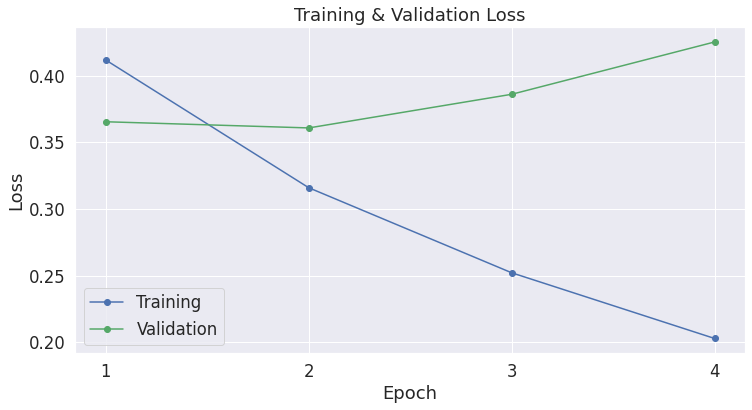

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [20]:
!wget "https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/test.txt?raw=true" -O test.txt

--2021-04-13 11:39:57--  https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/test.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4889845 (4.7M) [text/plain]
Saving to: ‘test.txt’

test.txt            100%[===================>]   4.66M  --.-KB/s    in 0.04s   

2021-04-13 11:39:57 (115 MB/s) - ‘test.txt’ saved [4889845/4889845]



In [21]:
text1 = open("test.txt", "r").read()

In [22]:
test = []
labels = []
textlines = text1.split('\n')
for i in textlines:
  label = ['OBJECTIVE','METHODS','RESULTS','CONCLUSIONS','BACKGROUND']
  iLen = len(i.split('\t'))
  # checking if there are only two parts of the sentence, the label and the sentence text
  if iLen == 2:
   # each label ends with tab separator so splitting again for '\t'
   l, text = i.split('\t')
   if l in label:
     labels.append(label.index(l))
     test.append(text)

In [23]:
import pandas as pd

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [24]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 30,135 test sentences...
    DONE.


In [26]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


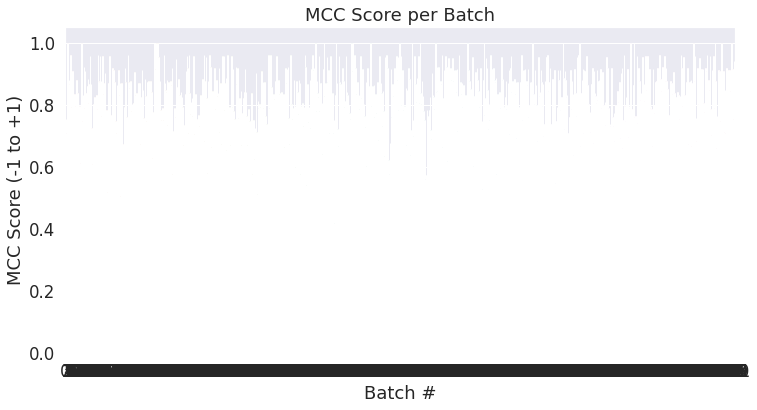

In [27]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [28]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.820


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [31]:
print('Accuracy:',accuracy_score(test,labels))
acc = accuracy_score(test,labels)
print('Precision:', precision_score(test,labels,pos_label='positive',average='micro'))
pre = precision_score(test,labels,pos_label='positive',average='micro')
print('Recall:', recall_score(test,labels,pos_label='positive',average='micro'))
rec = recall_score(test,labels,pos_label='positive',average='micro')
print('F1 Score:', f1_score(test,labels, average='macro'))
f1 = f1_score(labels, test, average='macro')